In [116]:
import pandas as pd
import numpy as np
import math
import glob
import datetime

### вытащить площади
### привести к миллиметрам
### досчитать мелочи

In [152]:
path = '/mnt/SSD/education/aspirantura/CAMELS_ru/files/hydrology/2020-09-22_15-39'
all_files = glob.glob(path + '/*_Q_Day.Cmd.txt')

test = pd.read_csv(all_files[14], skiprows = 36, delimiter = ';', skipinitialspace = True)
test.Value = test.Value.replace(-999, np.NaN)
test['YYYY-MM-DD'] = pd.to_datetime(test['YYYY-MM-DD'])
test = test.drop(columns = ['hh:mm'])
test.rename(columns = {'YYYY-MM-DD': 'Date'}, inplace = True)

### q_mean

In [139]:
test.Value.to_numpy()[~np.isnan(test.Value.to_numpy())].mean()

0.3417528910529519

### slope_fdc

In [143]:
np.nanquantile(test.Value.to_numpy(), q = 0.33)

0.0

In [144]:
np.nanquantile(test.Value.to_numpy(), q = 0.33), np.nanquantile(test.Value.to_numpy(), q = 0.66), np.nanquantile(test.Value.to_numpy(), q = 0.99)

(0.0, 0.0, 10.0)

In [145]:
try:
    (math.log(np.nanquantile(test.Value.to_numpy(), q = 0.33)) - math.log(np.nanquantile(test.Value.to_numpy(), q = 0.66)))/(0.66 - 0.33)
except ValueError:
    print('33 перцентиль = {}, 66 перцентиль = {}'.format(np.nanquantile(test.Value.to_numpy(), q = 0.33), np.nanquantile(test.Value.to_numpy(), q = 0.66)))
finally:
    print(
        (math.log(np.nanquantile(test.Value.to_numpy(), q = 0.33)+0.0009) - math.log(np.nanquantile(test.Value.to_numpy(), q = 0.66)+0.001))/(0.66 - 0.33))

33 перцентиль = 0.0, 66 перцентиль = 0.0
-0.31927428987220235


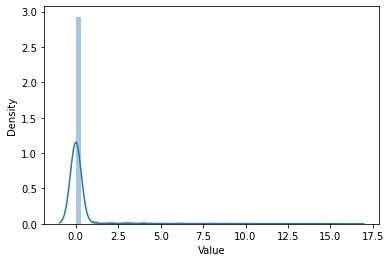

In [146]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(test.Value, hist=True)

plt.show()

### baseflow_index

In [147]:
def clump_array(a):
    
    """
    Разбить период наблюдений на куски, в которых нет NaN
    """
    
    return [a[s] for s in np.ma.clump_unmasked(np.ma.masked_invalid(a))]

clump_discharge = clump_array(discharge)
q_fi = [[[] for _ in range(len(i))] for i in clump_discharge]
q_bi = [[[] for _ in range(len(i))] for i in clump_discharge]
bfi_sum = [[] for _ in range(len(clump_discharge))]

for i in range(len(clump_discharge)):
    for j in range(len(clump_discharge[i])-1):

        q_fi[i][0] = alpha * clump_discharge[i][0] + (1 + alpha)/2 * (clump_discharge[i][1] - clump_discharge[i][0])
        q_bi[i][0] = clump_discharge[i][0] - q_fi[i][0]

        q_fi[i][j+1] = alpha * q_fi[i][j] + (clump_discharge[i][j+1] - clump_discharge[i][j]) * (1 + alpha)/2
        
        if q_fi[i][j+1] < 0:
            q_fi[i][j+1] = 0
        q_bi[i][j+1] = clump_discharge[i][j+1] - q_fi[i][j+1]

    bfi_sum[i].append(np.sum(q_bi[i])/np.sum(q_fi[i]))

np.average(bfi_sum)

0.3459677247976887

### hfd_mean

In [174]:
split_by_year = [test[test['Date'].dt.year == y].reset_index(drop = True) for y in test['Date'].dt.year.unique()]
hfd = list()

In [175]:
for i in range(len(split_by_year)):
    half_discharge = 0
    for j, discharge in enumerate(split_by_year[i].Value):    
        half_discharge += discharge
        if half_discharge > split_by_year[i].Value.sum()/2:
            break
    hfd.append(split_by_year[i].Date[j])
    

In [177]:
hfd

[Timestamp('1978-03-15 00:00:00'),
 Timestamp('1979-03-27 00:00:00'),
 Timestamp('1980-04-08 00:00:00'),
 Timestamp('1981-03-25 00:00:00'),
 Timestamp('1982-04-05 00:00:00'),
 Timestamp('1983-03-23 00:00:00'),
 Timestamp('1984-12-31 00:00:00'),
 Timestamp('1985-04-06 00:00:00'),
 Timestamp('1986-03-28 00:00:00'),
 Timestamp('1987-04-22 00:00:00')]

In [ ]:
import pandas as pd
import glob

path = r'C:\DRO\DCL_rawdata_files' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)